In [11]:
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
sample_nifti = nib.load('/mnt/storage/deva/BreastCancer_GeneticMutation/Deidentified_studies/media/Datacenter_storage/Breatcancer_GeneticMR/Data/Deidentified_studies/7100207_1.2.840.113717.2.16621689.1_1.3.6.1.4.1.25403.1322.7044.20120329103438.1717.2.16621689.1.nii.gz')
sample2_nifti = nib.load("/mnt/storage/deva/BreastCancer_GeneticMutation/Deidentified_studies/media/Datacenter_storage/Breatcancer_GeneticMR/Data/Deidentified_studies/2128719_1.2.840.113717.2.10478477.1_1.2.826.0.1.3680043.2.250.600370.1262613640.1.nii.gz")
image = nib.load('/mnt/storage/deva/BreastCancer_GeneticMutation/Deidentified_studies/media/Datacenter_storage/Breatcancer_GeneticMR/Data/Deidentified_studies/7430316_1.2.840.113717.2.16267330.1_1.3.6.1.4.1.25403.1322.7044.20120329103438.1717.2.16267330.1.nii.gz')
# print(image.header)
temp = nib.load('/mnt/storage/deva/BreastCancer_GeneticMutation/Deidentified_studies/media/Datacenter_storage/Breatcancer_GeneticMR/Data/Deidentified_studies/7430316_1.2.840.113717.2.16267330.1_1.3.6.1.4.1.25403.1322.7044.20120329103438.1717.2.16267330.1.nii.gz')
image = sample2_nifti
print(sample_nifti.header)
if(image.header.get_data_dtype() == 'uint16'):
    print("this works")
    image = image.get_fdata()
else: #[('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]
    image = image.dataobj
    image = np.array(image)['R']
image = 255 * ((image - image.min())/(image.max()-image.min()))
image = image.astype(np.uint8)
print(image.dtype)
print(image.shape)
# a = a.dataobj
# a = np.array(a)

# a = a['R']
# a = 255 * ((a-a.min())/(a.max()-a.min()))
# image = a.astype(np.uint8)
# print(image.dtype)
# sample2 = sample2_nifti.get_fdata() 
# sample2 = 255 * ((sample2-sample2.min())/(sample2.max()-sample2.min()))
# sample2 = sample2.astype(np.uint8)

# print(sample2_nifti.header)
# print(image.dtype)
# print(sample2.dtype)
# plt.imshow(sample[:,:,100], cmap='gray')
# plt.show()



<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 512 512 112   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : RGBA
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         0.6237793  0.6237793  1.7999991  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 153.202
qoffset_y       : -149.40523
qoffset_z  

In [29]:
print(sample.dtype)
print(sample.shape)
print(sample_nifti.header)

[('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]
(512, 512, 112)
(512, 512, 112)
(512, 512, 92)
[('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]
float64
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 512 512 112   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : RGBA
bitpix          : 32
slice_start     : 0
pixdim          : [-1.         0.6237793  0.6237793  1.7999991  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unkno

In [ ]:
# Assuming 8-bit RGBA channels
r = sample[..., 0].astype(np.uint16)
g = sample[..., 1].astype(np.uint16)
b = sample[..., 2].astype(np.uint16)

# Combine channels: R(5 bits), G(6 bits), B(5 bits) into 16 bits
combined = (r >> 3) << 11 | (g >> 2) << 5 | (b >> 3)
uint16_data = sample[..., 0].astype(np.uint16)  # Use the red channel
# Create a new NIfTI image with the converted data
new_img = nib.Nifti1Image(uint16_data, nifti_file.affine, nifti_file.header)

# Adjust the header to reflect the new data type
new_img.header.set_data_dtype(np.uint16)

# Save the new NIfTI file
nib.save(new_img, 'output_file_uint16.nii')



In [ ]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split
from scipy.ndimage import zoom
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from models.resnet import generate_model
import csv
from sklearn.metrics import precision_score, recall_score, roc_curve, auc

import pytorch_resnet

In [8]:
# Initialize a list to store epoch metrics
metrics = []
skipped_files_count = []
# Define the dataset class
class BreastCancer3DDataset(Dataset):
    def __init__(self, csv_path, target_shape=(96, 96, 96), transform=None):
        self.data = pd.read_csv(csv_path)
        self.data['NIFTI location'] = self.data['NIFTI location'].apply(lambda x: os.path.abspath(x))
        self.labels = self.data['label'].values
        self.image_paths = self.data['NIFTI location'].values
        self.target_shape = target_shape
        self.transform = transform
        self.valid_indices, self.skipped_count = self.filter_valid_files()
        skipped_files_count.append({"csv_path": csv_path, "skipped_files": self.skipped_count})

    def filter_valid_files(self):
        valid_indices = []
        skipped_count = 0
        for idx, image_path in enumerate(self.image_paths):
            try:
                _ = nib.load(image_path).get_fdata()  # Attempt to load the image
                valid_indices.append(idx)
            except Exception as e:
                skipped_count += 1
                print(f"Skipping invalid file: {image_path}, Error: {e}")
        return valid_indices, skipped_count

    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        real_idx = self.valid_indices[idx]
        image_path = self.image_paths[real_idx]
        label = self.labels[real_idx]
        image = self.load_and_preprocess_image(image_path)
        if self.transform:
            image = self.transform(image)
        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

    def load_and_preprocess_image(self, image_path):
        image = nib.load(image_path).get_fdata()
        zoom_factors = [t / s for t, s in zip(self.target_shape, image.shape)]
        resized_image = zoom(image, zoom_factors, order=1)
        resized_image = np.interp(resized_image, (resized_image.min(), resized_image.max()), (0, 1))
        return np.expand_dims(resized_image, axis=0)  # Add channel dim
def custom_collate_fn(batch):
    images, labels = zip(*batch)  # Unpack batch
    return torch.stack(images), torch.tensor(labels)


/tmp/ipykernel_411389/870078696.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/mnt/storage/deva/3D-ResNets-PyTorch/best_resnet3d_mode

Skipping invalid file: /mnt/storage/deva/BreastCancer_GeneticMutation/Deidentified_studies/media/Datacenter_storage/Breatcancer_GeneticMR/Data/Deidentified_studies/7100207_1.2.840.113717.2.16621689.1_1.3.6.1.4.1.25403.1322.7044.20120329103438.1717.2.16621689.1.nii.gz, Error: The DTypes <class 'numpy.dtypes.VoidDType'> and <class 'numpy.dtypes.Float64DType'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.
Skipping invalid file: /mnt/storage/deva/BreastCancer_GeneticMutation/Deidentified_studies/media/Datacenter_storage/Breatcancer_GeneticMR/Data/Deidentified_studies/7434378_1.2.840.113717.2.16242450.1_1.3.6.1.4.1.25403.1322.7044.20120329103438.1717.2.16242450.1.nii.gz, Error: The DTypes <class 'numpy.dtypes.VoidDType'> and <class 'numpy.dtypes.Float64DType'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.
Skipping invalid file: /mnt/storage/deva/BreastCancer_Geneti

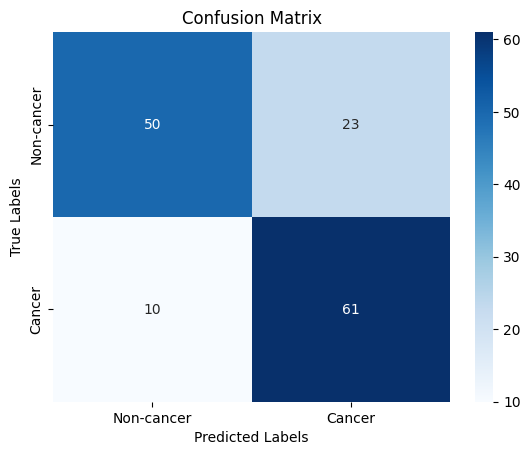

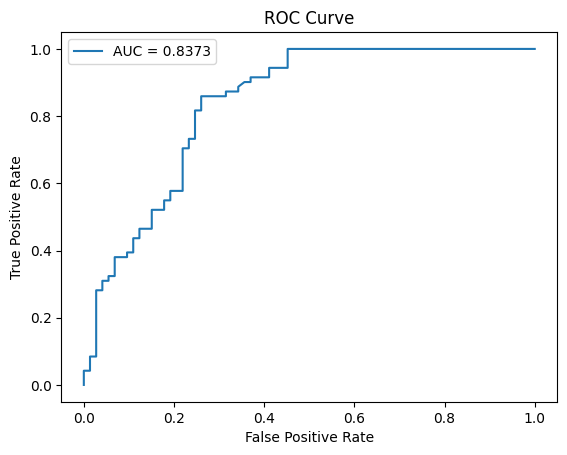

Precision: 0.7262
Recall: 0.8592
AUC: 0.8373


In [19]:
# # Initialize the ResNet3D model
# model = generate_model(model_depth=18, n_classes=2, n_input_channels=1)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)
# Load the best model
model = generate_model(model_depth=18, n_classes=2, n_input_channels=1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.load_state_dict(torch.load('/mnt/storage/deva/3D-ResNets-PyTorch/best_resnet3d_model.pth', map_location='cpu'))
model.eval()
test_csv_path = '/mnt/storage/deva/Data/combined_test_data.csv'
test_dataset = BreastCancer3DDataset(test_csv_path)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4, collate_fn=custom_collate_fn)

# Evaluate on the test set
all_labels, all_preds, all_probs = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)[:, 1]
        preds = torch.argmax(outputs, dim=1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)
all_probs = np.array(all_probs)

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, TPR, FPR
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
fpr, tpr, _ = roc_curve(all_labels, all_probs)

# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-cancer", "Cancer"],
            yticklabels=["Non-cancer", "Cancer"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC Curve
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {roc_auc:.4f}")


<h1> Plotting confidence intervals</h1>

Precision: 0.7287 (95% CI: 0.7257 - 0.7316)
Recall: 0.8582 (95% CI: 0.8557 - 0.8607)
AUC: 0.8380 (95% CI: 0.8360 - 0.8401)


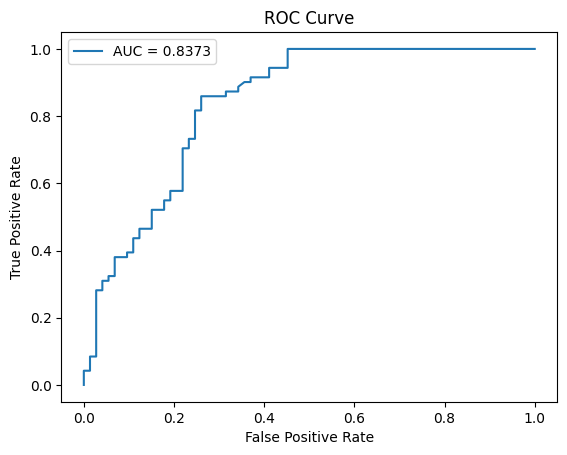

In [22]:

# Bootstrap resampling to calculate confidence intervals
from sklearn.utils import resample
from scipy.stats import norm

# Define number of bootstrap samples
n_bootstrap = 1000
precision_scores, recall_scores, roc_auc_scores = [], [], []

for _ in range(n_bootstrap):
    # Resample predictions and labels with replacement
    indices = np.random.choice(len(all_labels), size=len(all_labels), replace=True)
    boot_labels = all_labels[indices]
    boot_preds = all_preds[indices]
    boot_probs = all_probs[indices]

    # Calculate metrics for this bootstrap sample
    precision_scores.append(precision_score(boot_labels, boot_preds))
    recall_scores.append(recall_score(boot_labels, boot_preds))
    roc_auc_scores.append(roc_auc_score(boot_labels, boot_probs))

# Function to compute confidence intervals
def compute_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    margin_of_error = std_err * norm.ppf((1 + confidence) / 2)  # Z-score for CI
    return mean - margin_of_error, mean + margin_of_error

# Calculate confidence intervals for each metric
precision_ci = compute_confidence_interval(precision_scores)
recall_ci = compute_confidence_interval(recall_scores)
roc_auc_ci = compute_confidence_interval(roc_auc_scores)

# Print metrics with confidence intervals
print(f"Precision: {np.mean(precision_scores):.4f} (95% CI: {precision_ci[0]:.4f} - {precision_ci[1]:.4f})")
print(f"Recall: {np.mean(recall_scores):.4f} (95% CI: {recall_ci[0]:.4f} - {recall_ci[1]:.4f})")
print(f"AUC: {np.mean(roc_auc_scores):.4f} (95% CI: {roc_auc_ci[0]:.4f} - {roc_auc_ci[1]:.4f})")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
from sklearn.utils import resample

# Define number of bootstrap samples
n_bootstrap = 1000

# Store metrics from bootstrap samples
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

for i in range(n_bootstrap):
    # Resample predictions and labels with replacement
    boot_indices = np.random.choice(len(all_labels), size=len(all_labels), replace=True)
    boot_labels = all_labels[boot_indices]
    boot_preds = all_preds[boot_indices]
    boot_probs = all_probs[boot_indices]

    # Compute metrics for this bootstrap sample
    accuracy_scores.append(accuracy_score(boot_labels, boot_preds))
    precision_scores.append(precision_score(boot_labels, boot_preds))
    recall_scores.append(recall_score(boot_labels, boot_preds))
    f1_scores.append(f1_score(boot_labels, boot_preds))
    roc_auc_scores.append(roc_auc_score(boot_labels, boot_probs))

<h1>Working code - Jan 6 - Pytorch resnet3d</h1>

In [ ]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split
from scipy.ndimage import zoom
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from models.resnet import generate_model
import csv

# Initialize a list to store epoch metrics
metrics = []
skipped_files_count = []

# Define the dataset class
class BreastCancer3DDataset(Dataset):
    def __init__(self, csv_path, target_shape=(96, 96, 96), transform=None):
        self.data = pd.read_csv(csv_path)
        self.data['NIFTI location'] = self.data['NIFTI location'].apply(lambda x: os.path.abspath(x))
        self.labels = self.data['label'].values
        self.image_paths = self.data['NIFTI location'].values
        self.target_shape = target_shape
        self.transform = transform
        self.valid_indices, self.skipped_count = self.filter_valid_files()
        skipped_files_count.append({"csv_path": csv_path, "skipped_files": self.skipped_count})

    def filter_valid_files(self):
        valid_indices = []
        skipped_count = 0
        for idx, image_path in enumerate(self.image_paths):
            try:
                _ = nib.load(image_path).get_fdata()  # Attempt to load the image
                valid_indices.append(idx)
            except Exception as e:
                skipped_count += 1
                print(f"Skipping invalid file: {image_path}, Error: {e}")
        return valid_indices, skipped_count

    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        real_idx = self.valid_indices[idx]
        image_path = self.image_paths[real_idx]
        label = self.labels[real_idx]
        image = self.load_and_preprocess_image(image_path)
        if self.transform:
            image = self.transform(image)
        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

    def load_and_preprocess_image(self, image_path):
        image = nib.load(image_path).get_fdata()
        zoom_factors = [t / s for t, s in zip(self.target_shape, image.shape)]
        resized_image = zoom(image, zoom_factors, order=1)
        resized_image = np.interp(resized_image, (resized_image.min(), resized_image.max()), (0, 1))
        return np.expand_dims(resized_image, axis=0)  # Add channel dim

# Helper function to filter out skipped files
def clean_loader(loader):
    return [(images, labels) for images, labels in loader if images is not None]
def custom_collate_fn(batch):
    images, labels = zip(*batch)  # Unpack batch
    return torch.stack(images), torch.tensor(labels)

# Paths to your dataset CSV
train_csv_path = '/mnt/storage/deva/Data/new_train_data.csv'
val_csv_path = '/mnt/storage/deva/Data/new_val_data.csv'
test_csv_path = '/mnt/storage/deva/Data/combined_test_data.csv'

# Create datasets and dataloaders
train_dataset = BreastCancer3DDataset(train_csv_path)
val_dataset = BreastCancer3DDataset(val_csv_path)
test_dataset = BreastCancer3DDataset(test_csv_path)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4, collate_fn=custom_collate_fn)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=4, collate_fn=custom_collate_fn)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4, collate_fn=custom_collate_fn)

# Initialize the ResNet3D model
model = generate_model(model_depth=18, n_classes=2, n_input_channels=1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Define bootstrap function
def bootstrap_auc(labels, probs, n_iterations=1000, ci=95):
    auc_scores = []
    for _ in range(n_iterations):
        indices = resample(range(len(labels)), n_samples=len(labels))
        resampled_labels = labels[indices]
        resampled_probs = probs[indices]
        auc_scores.append(roc_auc_score(resampled_labels, resampled_probs))
    lower = np.percentile(auc_scores, (100 - ci) / 2)
    upper = np.percentile(auc_scores, 100 - (100 - ci) / 2)
    return lower, upper

# Function to evaluate model
def evaluate_model(loader, model):
    model.eval()
    all_labels, all_preds, all_probs = [], [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)[:, 1]
            preds = torch.argmax(outputs, dim=1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    return np.array(all_labels), np.array(all_preds), np.array(all_probs)

# Training loop
num_epochs = 20
best_val_auc = 0.0
checkpoint_interval = 5

for epoch in range(1, num_epochs+1):
    # Training
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for batch in train_loader:
        images, labels = batch[:2]  # Unpacking is safe now
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    
    # # Validation
    # val_labels, val_preds, val_probs = evaluate_model(val_loader, model)
    # val_loss = criterion(torch.tensor(val_probs), torch.tensor(val_labels, dtype=torch.float32)).item()
    # print(val_loss)
    # exit()
    # # val_labels, val_preds, val_probs = evaluate_model(val_loader, model)
    # # val_logits = torch.tensor(val_probs / (1 - val_probs + 1e-12)).log()  # Convert probabilities to logits
    # # # During validation, calculate the loss using logits and labels
    # # val_loss = criterion(val_logits, torch.tensor(val_labels, dtype=torch.long)).item()

    # # # val_loss = criterion(torch.tensor(val_preds, dtype=torch.float32), torch.tensor(val_labels)).item()
    # # val_auc = roc_auc_score(val_labels, val_probs)
    # # val_auc_lower, val_auc_upper = bootstrap_auc(val_labels, val_probs)
    # val_labels, val_preds, val_probs = evaluate_model(val_loader, model)

    # # Convert probabilities to logits using torch.logit instead of manual calculation
    # val_logits = torch.tensor(val_probs, dtype=torch.float32).logit(eps=1e-12)  # Avoid division by zero

    # # Ensure the labels are of the correct type
    # val_labels_tensor = torch.tensor(val_labels, dtype=torch.long)

    # # Calculate the validation loss
    # val_loss = criterion(val_logits, val_labels_tensor).item()

    # # Calculate AUC and confidence intervals
    # val_auc = roc_auc_score(val_labels, val_probs)
    # val_auc_lower, val_auc_upper = bootstrap_auc(val_labels, val_probs)


    # Collect metrics
    epoch_metrics = {
        "epoch": epoch,
        "train_loss": train_loss / len(train_loader),
        "train_accuracy": train_acc,
        "validation_loss": val_loss,
        "validation_auc": val_auc,
        "auc_ci_lower": val_auc_lower,
        "auc_ci_upper": val_auc_upper,
    }
    metrics.append(epoch_metrics)

    print(
        f"Epoch {epoch}/{num_epochs}, "
        f"Train Loss: {train_loss / len(train_loader):.4f}, Train Acc: {train_acc:.2f}%\n"
        f"Validation Loss: {val_loss:.4f}, Validation AUC: {val_auc:.4f}, "
        f"AUC Confidence Interval: ({val_auc_lower:.4f}, {val_auc_upper:.4f})"
    )


    # Save model periodically and based on best validation AUC
    if epoch % checkpoint_interval == 0:
        checkpoint_path = f"checkpoint_epoch_{epoch + 1}.pth"
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': train_loss,
        }, checkpoint_path)
        print(f"Checkpoint saved at epoch {epoch + 1}.")

    if val_auc > best_val_auc:
        best_val_auc = val_auc
        torch.save(model.state_dict(), "best_resnet3d_model.pth")
        print("Best model saved.")

# Save metrics to CSV after training
csv_file_path = "training_metrics_1.csv"
pd.DataFrame(metrics).to_csv(csv_file_path, index=False)
print(f"Metrics saved to {csv_file_path}")

# Save skipped files count to CSV
skipped_files_csv_path = "skipped_files_count_1.csv"
pd.DataFrame(skipped_files_count).to_csv(skipped_files_csv_path, index=False)
print(f"Skipped files count saved to {skipped_files_csv_path}")

# Test the model
model.load_state_dict(torch.load("best_resnet3d_model.pth"))
test_labels, test_preds, test_probs = evaluate_model(test_loader, model)

# Metrics
print(classification_report(test_labels, test_preds))
sns.heatmap(confusion_matrix(test_labels, test_preds), annot=True, fmt="d", cmap="Blues")
plt.show()
fpr, tpr, _ = roc_curve(test_labels, test_probs)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(test_labels, test_probs):.4f}")
plt.legend()
plt.show()

# Metrics
conf_matrix = confusion_matrix(test_labels, test_preds)
print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-cancer", "Cancer"], yticklabels=["Non-cancer", "Cancer"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Load the trained model for evaluation on the test set
model.load_state_dict(torch.load(save_path))
model.eval()

all_test_labels, all_test_outputs = [], []

# Evaluate on the test dataset
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        all_test_labels.extend(labels.cpu().numpy())
        all_test_outputs.extend(outputs.cpu().numpy())

# Convert predictions to binary using an optimal threshold
optimal_threshold = plot_roc_curve(all_test_labels, all_test_outputs)
test_preds = (np.array(all_test_outputs) > optimal_threshold).astype(int)

# Calculate evaluation metrics
test_precision = precision_score(all_test_labels, test_preds)
test_recall = recall_score(all_test_labels, test_preds)
test_f1 = f1_score(all_test_labels, test_preds)
test_roc_auc = roc_auc_score(all_test_labels, all_test_outputs)
test_cm = confusion_matrix(all_test_labels, test_preds)

# Print evaluation metrics
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test ROC AUC: {test_roc_auc:.4f}")
print("Confusion Matrix:")
print(test_cm)

# Visualize confusion matrix
plot_confusion_matrix(all_test_labels, test_preds)

# Save test predictions and true labels to a CSV file
test_preds_file = "test_predictions.csv"
test_predictions_data = pd.DataFrame({
    "True Label": all_test_labels,
    "Predicted Probability": all_test_outputs,
    "Predicted Label": test_preds
})
test_predictions_data.to_csv(test_preds_file, index=False)
print(f"Test predictions saved to {test_preds_file}")


In [1]:
# import pandas as pd
# import os

# # Load your CSV file
# csv_file = '/mnt/storage/deva/Data/combined_test_data.csv'  # Replace with your actual file path
# df = pd.read_csv(csv_file)

# # Function to add prefix and change suffix
# def update_file_path(file_path):
#     print(file_path)
#     file_name = os.path.basename(file_path)  # Extract the file name
#     # Add the new prefix and change the suffix
#     updated_file_name = '/mnt/storage/deva/Vision_embeddings/Test/' + file_name.replace('.nii.gz', '.pkl')
#     print(updated_file_name)
#     return updated_file_name

# # Apply the update to the relevant column, assuming the column name is 'file_path'
# df['NIFTI location'] = df['NIFTI location'].apply(update_file_path)

# # Save the updated dataframe back to a CSV
# df.to_csv('/mnt/storage/deva/Data/Embeddings_from_M3D/test.csv', index=False)  # Replace with the desired output file path


In [ ]:
import torch
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt 
from models.resnet import generate_model 
# Load the saved model
def load_model(model, model_path, device):
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    model.eval()
    return model

# Get AUC ROC and optimal threshold
def calculate_roc_auc_and_threshold(model, val_loader, device):
    all_labels = []
    all_outputs = []
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            all_labels.extend(labels.cpu().numpy())
            all_outputs.extend(outputs.cpu().numpy())
    
    # Calculate AUC ROC
    auc_roc = roc_auc_score(all_labels, all_outputs)
    fpr, tpr, thresholds = roc_curve(all_labels, all_outputs)
    
    # Plot ROC curve inline
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_roc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    # Find optimal threshold (where TPR - FPR is maximized)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print(f"Optimal Threshold: {optimal_threshold:.4f}")
    
    return auc_roc, optimal_threshold

# Example usage in Jupyter notebook
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = generate_model(model_depth=18, n_classes=1, n_input_channels=1)  # Adjust the model accordingly
model_path = "best_model.pth"  # Path where your best model is saved

# Load the best model
model = load_model(model, model_path, device)

# Assuming val_loader is already defined, use it directly in the function
auc_roc, optimal_threshold = calculate_roc_auc_and_threshold(model, val_loader, device)
print(f"Validation AUC-ROC: {auc_roc:.4f}")
print(f"Optimal Threshold: {optimal_threshold:.4f}")

/tmp/ipykernel_1156720/1385892859.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


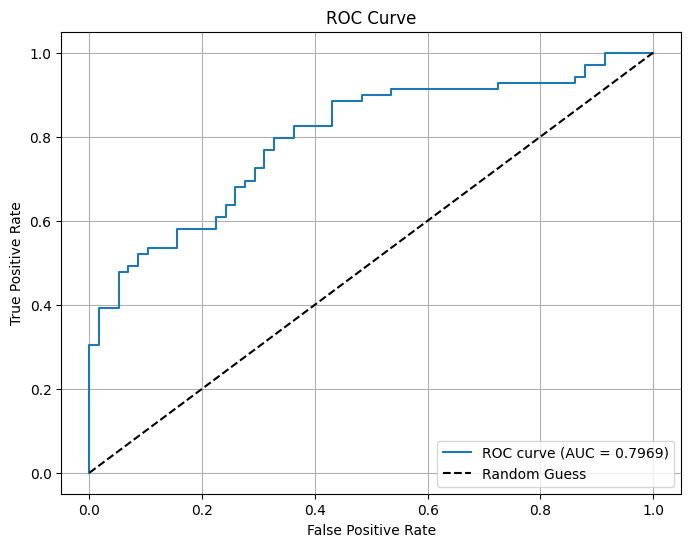

Optimal Threshold: 0.4638


In [32]:
import torch
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from resnet3d_plateau import DataLoader, BreastCancer3DDataset, custom_collate_fn
 
# Load saved metrics
# from Results_feb10/roc_metrics_plateau import auc_roc, optimal_threshold

auc_roc = 0.7968515742128937
optimal_threshold = 0.4638206362724304

BEST_MODEL_PATH = "best_model_feb10.pth"
VALIDATION_PATH = '/mnt/storage/deva/Data/ultimate_validation.csv'
# Plot ROC curve using saved metrics
def plot_roc_curve(val_loader, model, model_path, auc_roc, optimal_threshold, device):
    all_labels = []
    all_outputs = []
    
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    model.eval()
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            all_labels.extend(labels.cpu().numpy())
            all_outputs.extend(outputs.cpu().numpy())
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_outputs)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_roc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    print(f"Optimal Threshold: {optimal_threshold:.4f}")
val_csv_path = VALIDATION_PATH
val_dataset = BreastCancer3DDataset(val_csv_path)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=4, collate_fn=custom_collate_fn)

# Example usage in Jupyter notebook
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = generate_model(model_depth=18, n_classes=1, n_input_channels=1)  # Adjust the model accordingly
model_path = BEST_MODEL_PATH

# Plot the ROC curve using the saved metrics
plot_roc_curve(val_loader, model, model_path, auc_roc, optimal_threshold, device)


/tmp/ipykernel_1486715/2968198529.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


/mnt/storage/deva/3D-ResNets-PyTorch/mlp_latest.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(embedding, dtype=torch.float32), torch.tensor(label, dtype=torch.long)
/mnt/storage/deva/3D-ResNets-PyTorch/mlp_latest.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(embedding, dtype=torch.float32), torch.tensor(label, dtype=torch.long)
/mnt/storage/deva/3D-ResNets-PyTorch/mlp_latest.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(embedding, dtype=torch.float32), torch.

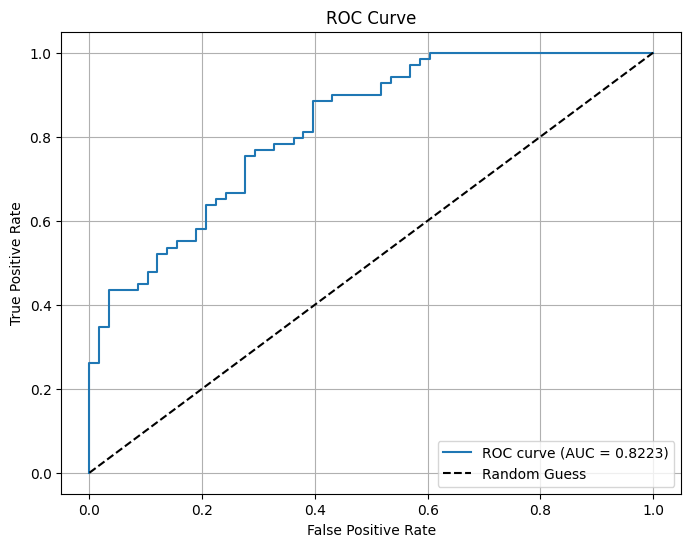

Optimal Threshold: 0.3664


In [7]:
import torch
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from mlp_latest import BreastCancer3DPickleDataset, custom_collate_fn, MLPClassifier
import multiprocessing

auc_roc = 0.8223388305847077
optimal_threshold = 0.36637622117996216

BEST_MODEL_PATH = "best_mlp_model_feb10.pth"
VALIDATION_PATH = '/mnt/storage/deva/Data/ultimate_validation.csv'

def plot_roc_curve(val_loader, model, model_path, auc_roc, optimal_threshold, device):
    all_labels = []
    all_outputs = []
    
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    model.eval()
    
    with torch.no_grad():
        for batch in val_loader:
            if batch is None:
                continue  # Skip invalid batches
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).squeeze()
            
            all_labels.extend(labels.cpu().numpy())
            all_outputs.extend(outputs.cpu().numpy())
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(all_labels, all_outputs)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_roc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    print(f"Optimal Threshold: {optimal_threshold:.4f}")


if __name__ == '__main__':
    # Prepare dataset and dataloader
    multiprocessing.set_start_method('spawn', force=True)
    # Load validation dataset
    val_dataset = BreastCancer3DPickleDataset(VALIDATION_PATH)
    val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=4, collate_fn=custom_collate_fn)

    # Initialize and load MLP model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MLPClassifier(input_dim=768).to(device)

    # Plot the ROC curve using the saved metrics
    plot_roc_curve(val_loader, model, BEST_MODEL_PATH, auc_roc, optimal_threshold, device)


In [3]:
# #AUC for test data
# import torch
# import numpy as np
# from sklearn.metrics import roc_curve
# import matplotlib.pyplot as plt
# from resnet3d_model_jan19 import DataLoader, BreastCancer3DDataset, custom_collate_fn
# from models.resnet import generate_model
# # Load saved metrics
# from roc_metrics_jan28 import auc_roc, optimal_threshold

# # Plot ROC curve using saved metrics
# def plot_roc_curve(test_loader, model, model_path, auc_roc, optimal_threshold, device):
#     all_labels = []
#     all_outputs = []
    
#     model.load_state_dict(torch.load(model_path))
#     model.to(device)
#     model.eval()
    
#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             all_labels.extend(labels.cpu().numpy())
#             all_outputs.extend(outputs.cpu().numpy())
    
#     # Calculate ROC curve
#     fpr, tpr, thresholds = roc_curve(all_labels, all_outputs)
    
#     # Plot ROC curve
#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_roc:.4f})')
#     plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.legend(loc="lower right")
#     plt.grid(True)
#     plt.show()
    
#     print(f"Optimal Threshold: {optimal_threshold:.4f}")
# test_csv_path = '/mnt/storage/deva/Data/combined_test_data.csv'
# test_dataset = BreastCancer3DDataset(test_csv_path)
# test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4, collate_fn=custom_collate_fn)

# # Example usage in Jupyter notebook
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = generate_model(model_depth=18, n_classes=1, n_input_channels=1)  # Adjust the model accordingly
# model_path = "best_model_jan27.pth"  # Path where your best model is saved

# # Plot the ROC curve using the saved metrics
# plot_roc_curve(test_loader, model, model_path, auc_roc, optimal_threshold, device)


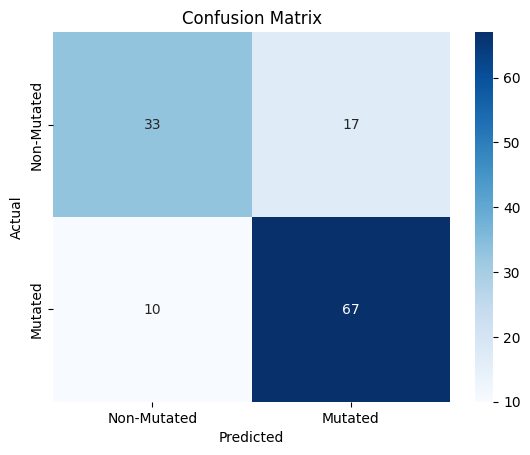

<h1>Plotting Loss curves</h1>

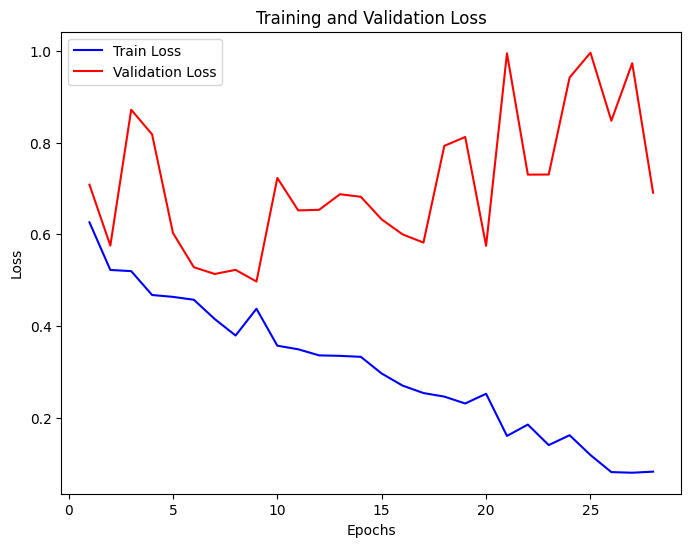

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# df = pd.read_csv("Results_feb6/metrics_resnet3d_plateau.csv")
df = pd.read_csv("/mnt/storage/deva/3D-ResNets-PyTorch/Results_March3/metrics_resnet3d.csv")
train_loss = df['train_loss']
val_loss = df['val_loss']
epochs = df['epoch']
# Normalize the losses to make them comparable for visualization
# train_loss_normalized = (train_loss - train_loss.min()) / (train_loss.max() - train_loss.min())
# val_loss_normalized = (val_loss - val_loss.min()) / (val_loss.max() - val_loss.min())

 
# print(train_loss_normalized)
# print(val_loss_normalized)

# Plot the normalized losses
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label="Train Loss", color='blue')
plt.plot(epochs, val_loss, label="Validation Loss", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


<h1>Plotting Learning Rates curve </h1>

In [ ]:
#code to extract text from the .out file and plot a curve for the learning rate.
import re
import matplotlib.pyplot as plt
df = pd.read_csv('training_metrics_feb2.csv')
learning_rates = df['learning_rate']
if not epochs or not learning_rates:
    print('epoch and learning rates are not calculated')
else:
    plt.figure(figsize=(8,5))
    plt.plot(epochs, learning_rates, label="Learning Rate")
    plt.title('Learning Rate Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.xticks(range(1, max(epochs) + 1 , max(epochs) // 10))
    plt.legend()
    plt.show()

<h1>Plotting LR curve using Regex</h1>

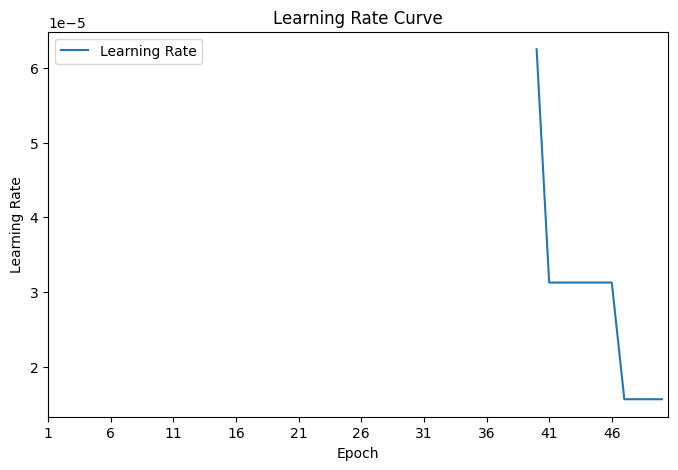

In [1]:
#code to extract text from the .out file and plot a curve for the learning rate for mlp
import re
import matplotlib.pyplot as plt
log_file_path = "/mnt/storage/deva/3D-ResNets-PyTorch/result_with_scheduler_jan28.out" #mlp output
with open(log_file_path, "r") as file:
    log_text = file.read()
# pattern = r"Epoch (\d+)/\d+,.*?Current Learning Rate: ([\d.]+)" #r"Epoch (\d+)/\d+,.*? Current Learning Rate: ([\d.]+)"
epoch_pattern = r"Epoch (\d+)/\d+"
lr_pattern = r"Current Learning Rate: ([0-9.e-]+)"
epochs = [int(match) for match in re.findall(epoch_pattern, log_text)]
learning_rates = [float(match) for match in re.findall(lr_pattern, log_text)]

if not epochs or not learning_rates:
    print('epoch and learning rates are not calculated')
else:
    plt.figure(figsize=(8,5))
    plt.plot(epochs, learning_rates, label="Learning Rate")
    plt.title('Learning Rate Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.xticks(range(1, max(epochs) + 1 , max(epochs) // 10))
    plt.legend()
    plt.show()

#Current Learning Rate: 0.001
# Epoch 1/50, Train Loss: 0.6490, Val Loss: 0.7934, Train Acc: 0.6543, Val Acc: 0.5441

<h1>Resnet3d - working code - Feb 6</h1>

In [2]:
import torch
import torch.nn as nn
from sklearn.metrics import roc_curve, confusion_matrix, auc
import os
import nibabel as nib
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve
from scipy.ndimage import zoom
from torch.utils.data import Dataset, DataLoader
from models.resnet import generate_model
import csv
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from torch.optim.lr_scheduler import ReduceLROnPlateau
import SimpleITK as sitk
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

<h1> Resampling NIFTI files </h1>

In [ ]:

def sitk_resample(itk_image, out_spacing=[1.1,1.1,3.0], interpolation=None):
    # Getting the original attributes
    original_spacing = itk_image.GetSpacing()
    original_size = itk_image.GetSize()

    resample = sitk.ResampleImageFilter()
    # Setting the output size
    out_size = [
                int(np.round(original_size[0] * (original_spacing[0] / out_spacing[0]))),
                int(np.round(original_size[1] * (original_spacing[1] / out_spacing[1]))),
                int(np.round(original_size[2] * (original_spacing[2] / out_spacing[2])))
                ]
    resample.SetSize(out_size)
    #  Setting the output spacing
    resample.SetOutputSpacing(out_spacing)
    # Setting the output direction
    resample.SetOutputDirection(itk_image.GetDirection())
    # Setting the output origin
    resample.SetOutputOrigin(itk_image.GetOrigin())
    # Setting the transform
    resample.SetTransform(sitk.Transform())
    # Setting the default pixel value
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    # Setting the interpolation
    if interpolation == None:
        resample.SetInterpolator(sitk.sitkLinear)
    elif interpolation == 'Linear':
        resample.SetInterpolator(sitk.sitkLinear)
    elif interpolation == 'NearestNeighbor':
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    elif interpolation == 'BSpline':
        resample.SetInterpolator(sitk.sitkBSpline)
    else:
        raise Exception("The interpolator should be one of 'Linear', 'NearestNeighbor', 'BSpline'")
   
    return resample.Execute(itk_image)


def registration(df, output_folder, csv_path):
    for ind in tqdm(df.index.values.tolist()):
        path = df.loc[ind, 'NIFTI location path']
        # thickness = df.loc[ind, 'SliceThickness']
        # Reading the volume
        image = sitk.ReadImage(path)
        # Adding the pixel spacing as well
        pixel_spacing_x = image.GetSpacing()[0]
        pixel_spacing_y = image.GetSpacing()[1]
        pixel_spacing_z = image.GetSpacing()[2]
        print(pixel_spacing_x, pixel_spacing_y, pixel_spacing_z)
        df.loc[ind, 'PixelSpacing_X'] = pixel_spacing_x
        df.loc[ind, 'PixelSpacing_Y'] = pixel_spacing_y
        df.loc[ind, 'PixelSpacing_Z'] = pixel_spacing_z
        if pixel_spacing_y == pixel_spacing_z:
            out_spacing=[3.0,1.1,1.1]
        else:
            out_spacing=[1.1,1.1,3.0]

        # Resampling the volume
        resampled_image = sitk_resample(image, out_spacing, interpolation='Linear')
        original_filename = os.path.basename(path)  # Extract filename from path
        resampled_filename = f"resampled_{original_filename}"  # Prefix resampled_
        resampled_filepath = os.path.join(output_folder, resampled_filename)

        # Save the resampled image
        writer = sitk.ImageFileWriter()
        writer.SetFileName(resampled_filepath)
        writer.Execute(resampled_image)

        # Update the DataFrame with the new file path
        df.loc[ind, 'ResampledNIFTIPath'] = resampled_filepath


    df.to_csv(csv_path, index=False)

file_path = '/mnt/storage/deva/Data/ultimate.csv'
output_path = '/mnt/storage/deva/Data/Resampled_images'
csv_output_path = '/mnt/storage/deva/Data/updated_ultimate_part2.csv'
df = pd.read_csv(file_path)
registration(df[:5], output_path, csv_output_path)

<h1> Ploting original Nifti files and resampled nifti files</h1>

In [ ]:
def plot_image(name, image):
    if(image.header.get_data_dtype() == 'uint16'):
        image = image.get_fdata()
    #dtype = uint8 [('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]
    else:
        image = image.dataobj
        image = np.array(image)['R']
    image = 255 * ((image - image.min())/(image.max()-image.min()))
    image = image.astype(np.uint8)
    x, y, z = image.shape[0], image.shape[1], image.shape[2]
    if (y==z):
        image = image.transpose((1,2,0))
    print(f"{name} = {image.shape}")
    plt.figure(figsize=(6,6))
    plt.imshow(image[:,:,image.shape[2]//2], cmap='gray', origin='lower')
    plt.show()

path = '/mnt/storage/deva/Data/updated_ultimate.csv'
df = pd.read_csv(path)
resampled_files = df['ResampledNIFTIPath']
files = df['NIFTI location path']

for rf, image in zip(resampled_files, files):
    rf, image = nib.load(rf), nib.load(image)
    # print("original")
    plot_image('Original', image)
    # print("resampled")
    plot_image('Resampled', rf)



Original = (512, 512, 210)


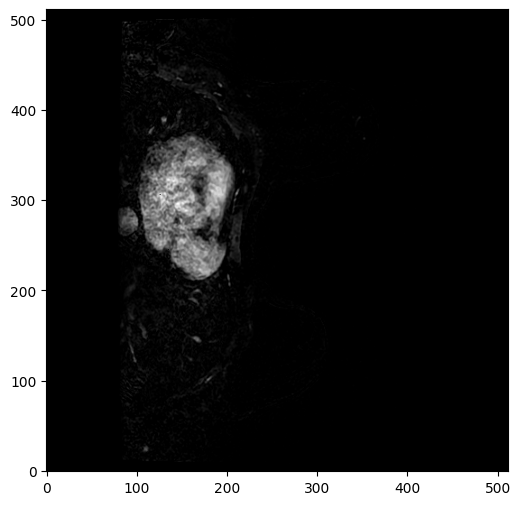

Resampled = (318, 318, 70)


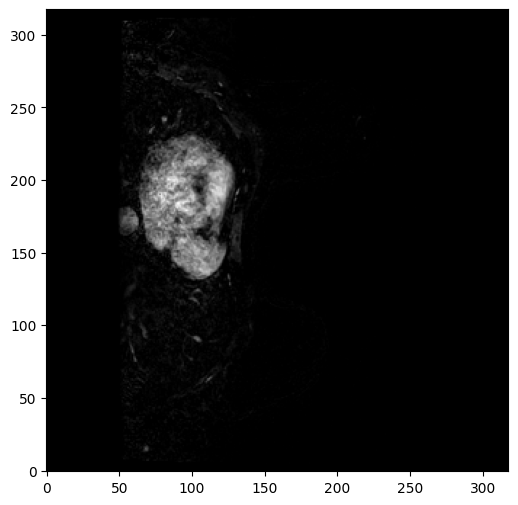

Original = (512, 512, 202)


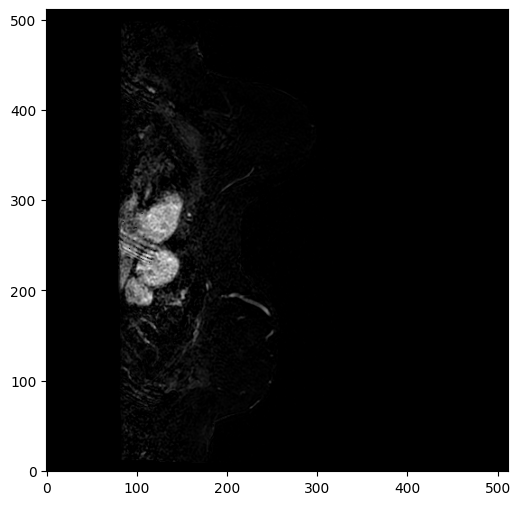

Resampled = (318, 318, 67)


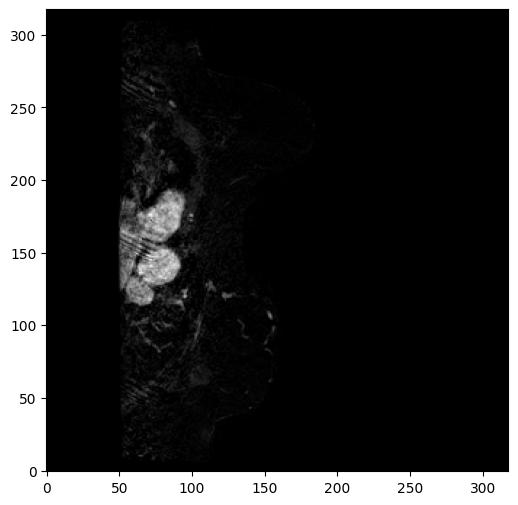

Original = (512, 512, 350)


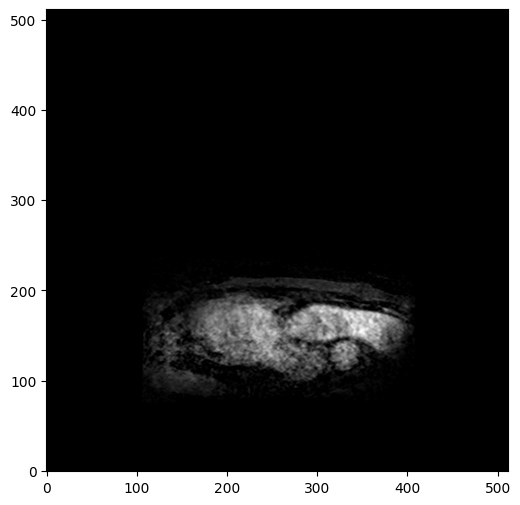

Resampled = (318, 318, 117)


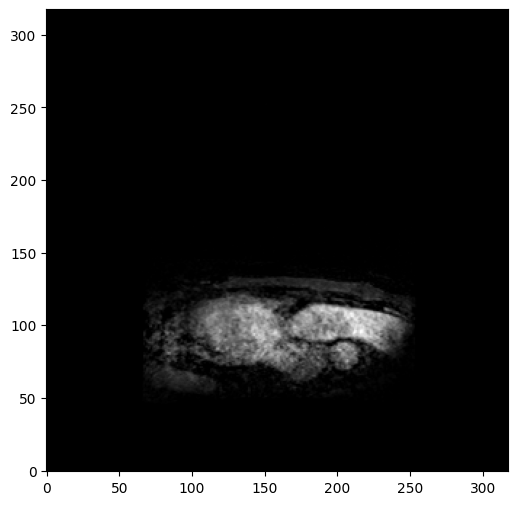

Original = (256, 256, 132)


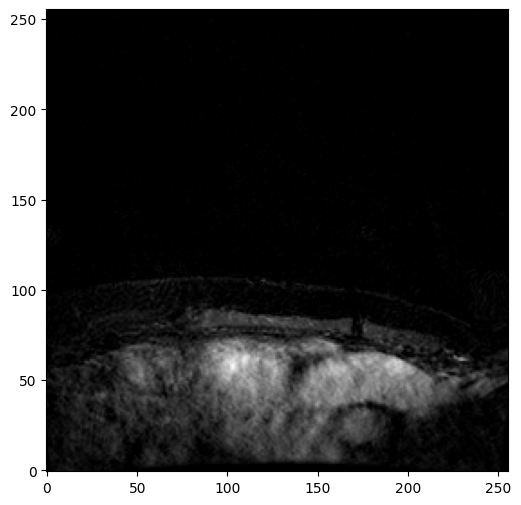

Resampled = (218, 218, 114)


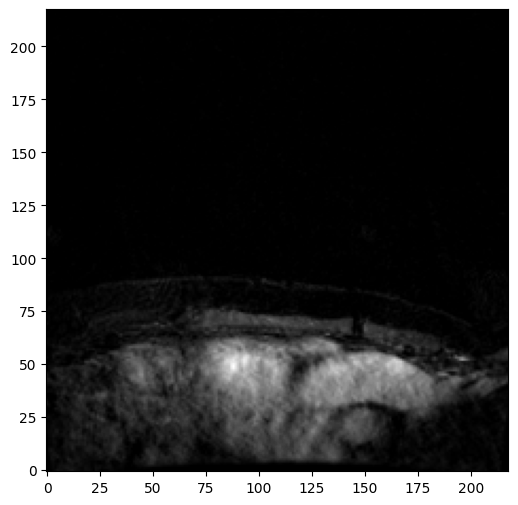

Original = (256, 256, 140)


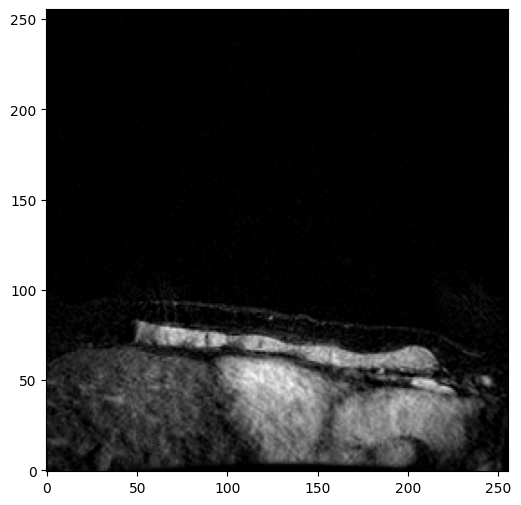

Resampled = (209, 209, 121)


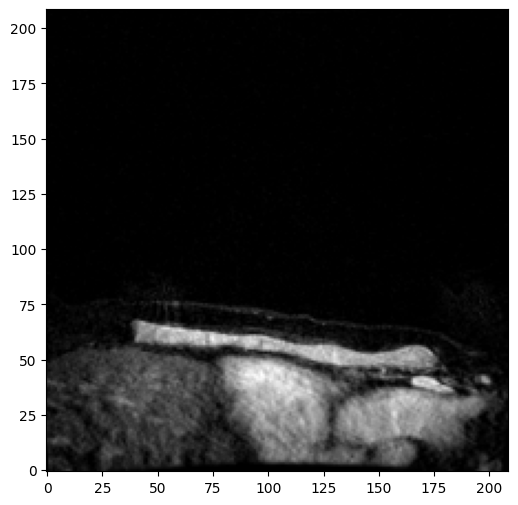

In [11]:
def plot_image(name, image):
    if(image.header.get_data_dtype() == 'uint16'):
        image = image.get_fdata()
    #dtype = uint8 [('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]
    else:
        image = image.dataobj
        image = np.array(image)['R']
    image = 255 * ((image - image.min())/(image.max()-image.min()))
    image = image.astype(np.uint8)
    x, y, z = image.shape[0], image.shape[1], image.shape[2]
    if (y==z):
        image = image.transpose((1,2,0))
    print(f"{name} = {image.shape}")
    plt.figure(figsize=(6,6))
    plt.imshow(image[:,:,image.shape[2]//2], cmap='gray', origin='lower')
    plt.show()

path = '/mnt/storage/deva/Data/updated_ultimate_part2.csv'
df = pd.read_csv(path)
resampled_files = df['ResampledNIFTIPath']
files = df['NIFTI location path']

for rf, image in zip(resampled_files, files):
    rf, image = nib.load(rf), nib.load(image)
    # print("original")
    plot_image('Original', image)
    # print("resampled")
    plot_image('Resampled', rf)

<h1>Histogram of different study descriptions</h1>

{'MR BREAST BILATERAL WITHOUT AND WITH IV CONTRAST': 1, 'MR BREAST': 2, 'MR BREAST BIOPSY LEFT WITH GUIDANCE': 3, 'B MR BREAST': 4, 'MR BREAST BIOPSY RIGHT WITH GUIDANCE': 5, 'MR BREAST BILATERAL WITH IV CONTRAST': 6, 'MR BREAST LOCALIZATION LEFT WITH MR GUIDANCE': 7, 'MRI BREAST BILATERAL WITHOUT AND WITH CON WITH CAD': 8, 'BREAST^2MM SENTINELLE COIL': 9, 'MR BREAST RIGHT WITHOUT AND WITH IV CONTRAST': 10, 'MR Breast Bilat w  and w o contrast': 11, 'BREAST^MASS': 12, 'MR Breast Bilateral W/WO Contrast': 13}


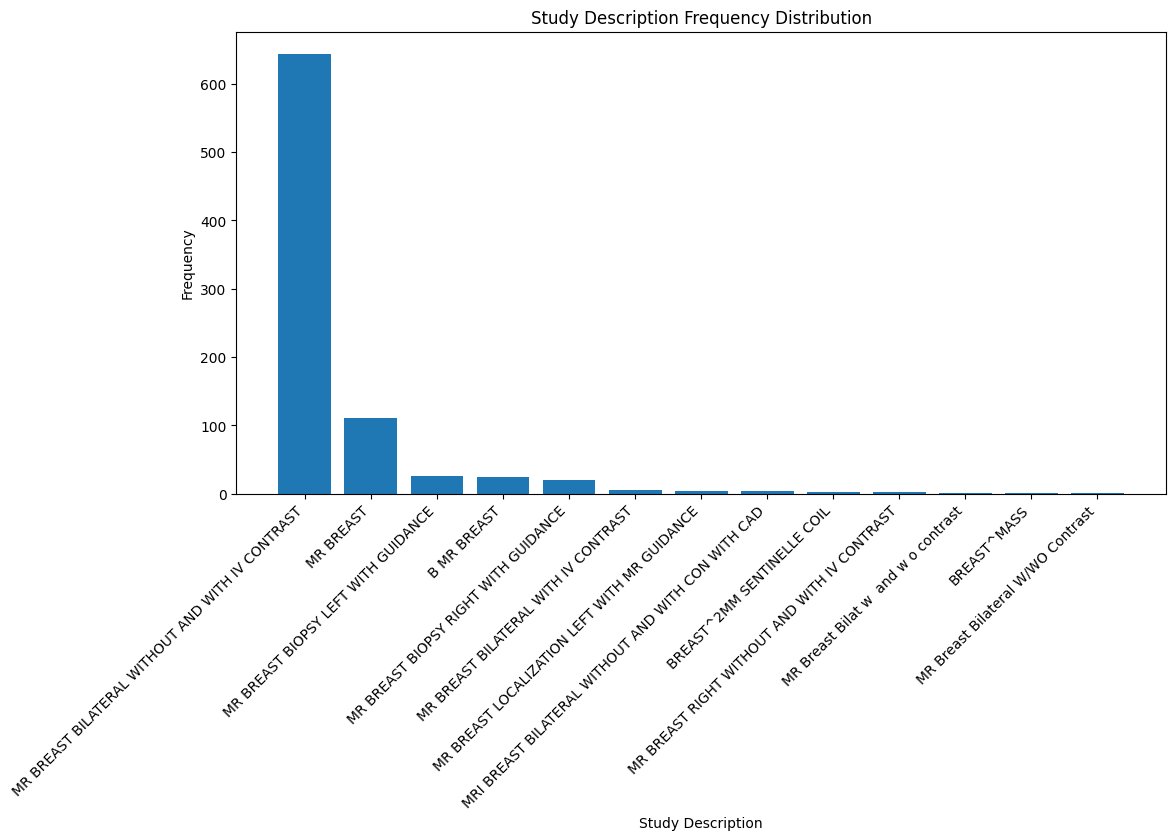

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = '/mnt/storage/deva/Data/ultimate.csv'
df = pd.read_csv(file_path)

# Extract study descriptions and count frequency
study_description_counts = df['StudyDescription'].value_counts()

# Create a mapping from study description to numbers (1 to 13)
study_mapping = {desc: i+1 for i, desc in enumerate(study_description_counts.index)}
print(study_mapping)
# Map study descriptions to numbers
mapped_x = [study_mapping[desc] for desc in study_description_counts.index]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(mapped_x, study_description_counts.values, tick_label=mapped_x)

# Label the x-axis with corresponding study descriptions
plt.xticks(mapped_x, study_description_counts.index, rotation=45, ha="right")

plt.xlabel("Study Description")
plt.ylabel("Frequency")
plt.title("Study Description Frequency Distribution")

plt.show()


<h1>Plotting slices of respective study description Nifti files</h1>

In [ ]:
# MR BREAST BILATERAL WITHOUT AND WITH IV CONTRAST

df = pd.read_csv('/mnt/storage/deva/Data/ultimate.csv')
column1, column2 = df['StudyDescription'][2:3], df['NIFTI location path'][2:3]
for c1, c2 in zip(column1, column2):
    if c1 == 'MR BREAST BILATERAL WITHOUT AND WITH IV CONTRAST':
        image = nib.load(c2)
        if(image.header.get_data_dtype() == 'uint16'):
            image = image.get_fdata()
        #dtype = uint8 [('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]
        else:
            image = image.dataobj
        x, y, z = image.shape[0], image.shape[1], image.shape[2]
        #slices of non transposed files - work better - why?
        print(image.shape)
        plt.figure()
        plt.imshow(image[:,image.shape[1]//2,:], cmap='jet', origin='lower')
        plt.show()
        if (y==z):
            image = image.transpose((1,2,0))
        print(image.shape)
        plt.figure()
        plt.imshow(image[:,:,image.shape[2]//2], cmap='jet', origin='lower')
        plt.show()

KeyError: 'ResampledNIFTIPath'

In [1]:
# # MR BREAST

# df = pd.read_csv('/mnt/storage/deva/Data/updated_ultimate.csv')
# column1, column2 = df['StudyDescription'], df['ResampledNIFTIPath']
# count =0
# for c1, c2 in zip(column1, column2):
#     # if c1 == 'MR BREAST BIOPSY LEFT WITH GUIDANCE':
#     if c1 == 'MR BREAST':
#         image = nib.load(c2)
#         if(image.header.get_data_dtype() == 'uint16'):
#             image = image.get_fdata()
#         #dtype = uint8 [('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]
#         else:
#             image = image.dataobj
#             image = np.array(image[:,:,:,0,0])
#         x, y, z = image.shape
#         if (y==z):
#             image = image.transpose((1,2,0))
#         print(image.shape)
#         plt.figure()
#         plt.imshow(image[:,:,image.shape[2]//2], cmap='jet', origin='lower')
#         plt.show()
        

<h1>Preprocessing - Dataset</h1>

In [2]:

TRAINING_METRICS_FILE_PATH = "training_metrics_feb2.csv"
BEST_MODEL_PATH = "best_model_feb2.pth"
class BreastCancer3DDataset(Dataset):
    def __init__(self, csv_path, target_shape=(96, 96, 96), transform=None):
        self.data = pd.read_csv(csv_path)
        self.data[' NIFTI location '] = self.data[' NIFTI location '].apply(lambda x: os.path.abspath(x))
        # self.labels = self.data['label'].values[:5]
        self.image_paths = self.data[' NIFTI location '].values[:5]
        print(self.data['StudyDescription'].values[:5])
        self.target_shape = target_shape
        self.transform = transform
        self.valid_indices = self.check_all_files()
    def check_all_files(self):
        valid_indices = []
        for idx, image_path in enumerate(self.image_paths): 
            try:
                self.load_and_preprocess_image(image_path)
                valid_indices.append(idx)
            except Exception as e:
                print(f"Warning: File {image_path} caused an error {e} and will be skipped")
        return valid_indices

    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        real_idx = self.valid_indices[idx]
        image_path = self.image_paths[real_idx]
        label = self.labels[real_idx]
        image = self.load_and_preprocess_image(image_path)
        if self.transform:
            image = self.transform(image)
        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

    def load_and_preprocess_image(self, image_path):
        image = nib.load(image_path)
        #dtype = uint16
        if(image.header.get_data_dtype() == 'uint16'):
            image = image.get_fdata()
        #dtype = uint8 [('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]
        else:
            image = image.dataobj
            image = np.array(image)['R']
        image = 255 * ((image - image.min())/(image.max()-image.min()))
        image = image.astype(np.uint8)

        self.plot_slice(image) #[:,:,image.shape[2]//2])
        zoom_factors = [t / s for t, s in zip(self.target_shape, image.shape)]
        resized_image = zoom(image, zoom_factors, order=1)

        # self.plot_slice(resized_image[:,:,resized_image.shape[2]//2])

        resized_image = np.interp(resized_image, (resized_image.min(), resized_image.max()), (0, 1))
        return np.expand_dims(resized_image, axis=0)  # Add channel dim
    def plot_slice(self, slice_data):
        # print(slice_data.shape)
        x = slice_data.shape[0]
        y = slice_data.shape[1]
        z = slice_data.shape[2]
        if (y==z):
            slice_data = slice_data.transpose((1,2,0))
        print(slice_data.shape)
        plt.figure(figsize=(6, 6))
        # plt.imshow(slice_data.T, cmap="gray", origin="lower")  # Transposed for correct orientation
        plt.imshow(slice_data[:,:,slice_data.shape[2]//3], cmap="gray", origin="lower")
        plt.axis("off")
        plt.show()

if __name__ == "__main__":
    # positive_csv_path = "/mnt/storage/deva/Data/finalstudies.csv"
    # negative_csv_path = "/mnt/storage/deva/Data/NegativeStudies_Additional_part1.csv"
    # train_csv_path = '/mnt/storage/deva/Data/new_train_data.csv'
    # train_dataset = BreastCancer3DDataset(positive_csv_path)
    file_path = '/mnt/storage/deva/Data/ultimate.csv'
    # dataset = BreastCancer3DDataset(file_path)
    registration(pd.read_csv(file_path))

NameError: name 'Dataset' is not defined

<h1>Process CSV files</h1>

847


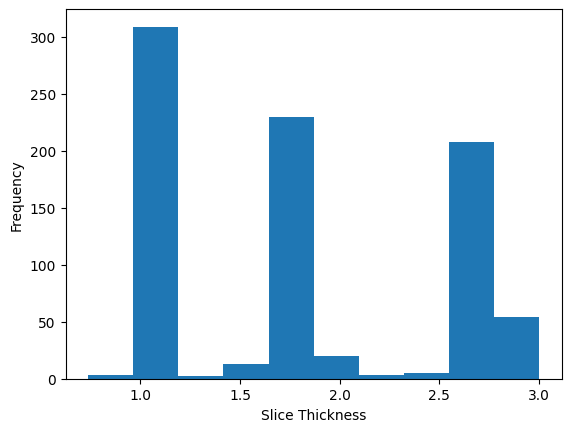

847


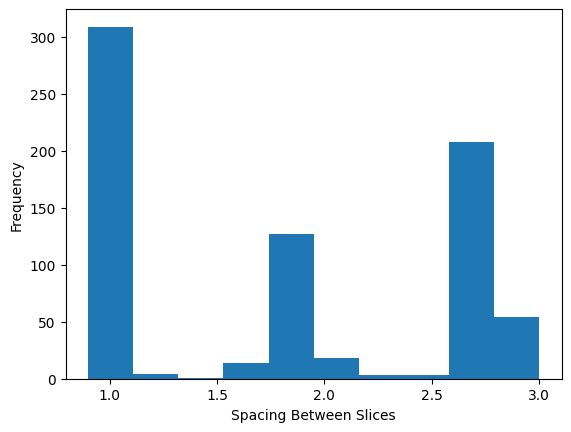

In [18]:
def plot_thickness(p1, p2, column_name, xLabel):
    df1 = pd.read_csv(p1)
    df2 = pd.read_csv(p2)
    c1 = df1[column_name]
    c2 = df2[column_name]
    res = []
    for c in c1:
        res.append(c)
    for c in c2:
        res.append(c)
    print(len(res))
    plt.hist(res)
    plt.xlabel(xLabel)
    plt.ylabel('Frequency')
    plt.show()

positive_csv_path = "/mnt/storage/deva/Data/finalstudies.csv"
negative_csv_path = "/mnt/storage/deva/Data/NegativeStudies_Additional_part1.csv"
plot_thickness(positive_csv_path, negative_csv_path, 'SliceThickness', 'Slice Thickness')
# plot_thickness(negative_csv_path, 'SliceThickness', 'Slice Thickness')

plot_thickness(positive_csv_path, negative_csv_path, 'SpacingBetweenSlices', 'Spacing Between Slices')
# plot_thickness(negative_csv_path, 'SpacingBetweenSlices', 'Spacing Between Slices')


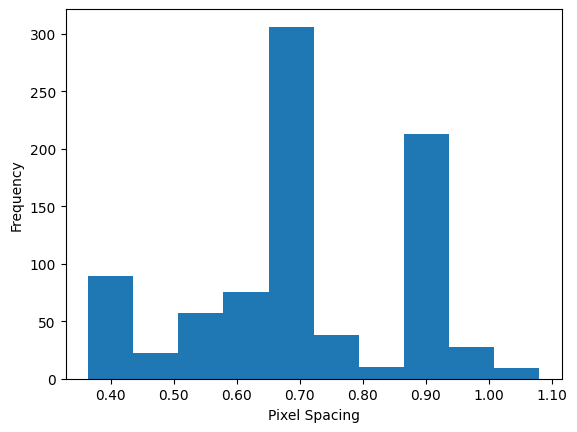

In [15]:

def plotPixelSpacing(p1, p2, column_name, xLabel):
    df1 = pd.read_csv(p1)
    df2 = pd.read_csv(p2)
    c1 = df1[column_name]
    c2 = df2[column_name]
    res = []
    for c in c1:
        res.append(float(c.split("'")[1]))
    for c in c2:
        res.append(float(c.split("'")[1]))
    fig, ax = plt.subplots()
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    plt.hist(res)
    plt.xlabel(xLabel)
    plt.ylabel('Frequency')
    plt.show()

plotPixelSpacing(positive_csv_path, negative_csv_path, 'PixelSpacing', 'Pixel Spacing')


In [3]:
import collections
def plot_rows(p1, p2, column_name, xLabel):
    df1 = pd.read_csv(p1)
    df2 = pd.read_csv(p2)
    c1 = df1[column_name]
    c2 = df2[column_name]
    res = []
    for c in c1:
        res.append(c)
    for c in c2:
        res.append(c)
    freq = collections.Counter(res)
    print(xLabel, freq.items())
    # plt.hist(res)
    # plt.xlabel(xLabel)
    # plt.ylabel('Frequency')
    # plt.show()

positive_csv_path = "/mnt/storage/deva/Data/finalstudies.csv"
negative_csv_path = "/mnt/storage/deva/Data/NegativeStudies_Additional_part1.csv"
plot_rows(positive_csv_path, negative_csv_path, 'Rows', 'Rows')
plot_rows(positive_csv_path, negative_csv_path, 'Columns', 'Columns')


df1 = pd.read_csv(positive_csv_path)
df2 = pd.read_csv(negative_csv_path)

df = pd.concat((df1, df2))
print(df.Rows.value_counts())
print(df.Columns.value_counts())

display(df[df['Columns']==378].Rows)
print(df.columns.values.tolist())

Rows dict_items([(512, 478), (256, 263), (568, 1), (768, 100), (448, 1), (352, 4)])
Columns dict_items([(512, 478), (256, 262), (568, 1), (768, 100), (448, 1), (352, 4), (378, 1)])
Rows
512    478
256    263
768    100
352      4
568      1
448      1
Name: count, dtype: int64
Columns
512    478
256    262
768    100
352      4
568      1
448      1
378      1
Name: count, dtype: int64


383    256
Name: Rows, dtype: int64

['BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'HighBit', 'InstanceNumber', 'Manufacturer', 'Modality', 'PatientAge', 'PatientSex', 'PatientSize', 'PatientWeight', 'PhotometricInterpretation', 'PixelRepresentation', 'PlanarConfiguration', 'ReferringPhysicianName', 'Rows', 'StudyDescription', 'WindowCenter', 'WindowWidth', 'has_pix_array', 'category', 'AcquisitionMatrix', 'AcquisitionNumber', 'AcquisitionTime', '0_AnatomicRegionSequence_CodeMeaning', '0_AnatomicRegionSequence_CodeValue', '0_AnatomicRegionSequence_CodingSchemeDesignator', 'AngioFlag', 'BeatRejectionFlag', 'CardiacNumberOfImages', 'ContentTime', 'ContrastBolusAgent', 'ContrastBolusRoute', 'EchoNumbers', 'EchoTime', 'EchoTrainLength', 'FlipAngle', 'HeartRate', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'ImagedNucleus', 'ImagesInAcquisition', 'ImagingFrequency', 'InPlanePhaseEncodingDirection', 'InStackPositionNumber', 'InversionTime', 'LargestImagePixelValue', 'MRAcquisitionType', 'Magn

In [4]:
# !pip install tqdm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [1]:
import SimpleITK as sitk
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

In [2]:


def sitk_resample(itk_image, out_spacing=[1.1,1.1,3.0], interpolation=None):
    # Getting the original attributes
    original_spacing = itk_image.GetSpacing()
    original_size = itk_image.GetSize()
    original_origin = itk_image.GetOrigin()

    resample = sitk.ResampleImageFilter()
    # Setting the output size
    out_size = [
                int(np.round(original_size[0] * (original_spacing[0] / out_spacing[0]))),
                int(np.round(original_size[1] * (original_spacing[1] / out_spacing[1]))),
                int(np.round(original_size[2] * (original_spacing[2] / out_spacing[2])))
                ]
    resample.SetSize(out_size)
    #  Setting the output spacing
    resample.SetOutputSpacing(out_spacing)
    # Setting the output direction
    resample.SetOutputDirection(itk_image.GetDirection())
    # Setting the output origin
    resample.SetOutputOrigin(itk_image.GetOrigin())
    # Setting the transform
    resample.SetTransform(sitk.Transform())
    # Setting the default pixel value
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    # Setting the interpolation
    if interpolation == None:
        resample.SetInterpolator(sitk.sitkLinear)
    elif interpolation == 'Linear':
        resample.SetInterpolator(sitk.sitkLinear)
    elif interpolation == 'NearestNeighbor':
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    elif interpolation == 'BSpline':
        resample.SetInterpolator(sitk.sitkBSpline)
    else:
        raise Exception("The interpolator should be one of 'Linear', 'NearestNeighbor', 'BSpline'")
   
    return resample.Execute(itk_image)


def registration(df, root_folder, csv_path):
    for ind in tqdm(df.index.values.tolist()):
        path = df.loc[ind, 'NIFTI location']
        # thickness = df.loc[ind, 'SliceThickness']
        # Reading the volume
        image = sitk.ReadImage(path)
        # Adding the pixel spacing as well
        pixel_spacing_x = image.GetSpacing()[0]
        pixel_spacing_y = image.GetSpacing()[1]
        pixel_spacing_z = image.GetSpacing()[2]
        df.loc[ind, 'PixelSpacing_X'] = pixel_spacing_x
        df.loc[ind, 'PixelSpacing_Y'] = pixel_spacing_y
        df.loc[ind, 'PixelSpacing_Z'] = pixel_spacing_z
        # Resampling the volume
        resampled_image = sitk_resample(image, out_spacing=[1.1,1.1,3.0], interpolation='Linear')

        # Getting the path for resampling the image
        write_path = path.split('/')[-1]
        write_path = os.path.join(root_folder, write_path)
        
        # Adding the path to the dataframe
        # df.loc[ind, 'NIFTIPath'] = path
        # comment by deva
        # df.loc[ind, 'ResampledNIFTIPath'] = write_path
        # df.loc[ind, 'ResampledNIFTISize'] = str(resampled_image.GetSize())

        # Writing the resampled volume to the path
        # comment by deva
        # writer = sitk.ImageFileWriter()
        # writer.SetFileName(write_path)
        # writer.Execute(resampled_image)


    df.to_csv(csv_path, index=None)

    return None
positive_csv_path = "/mnt/storage/deva/Data/finalstudies.csv"
negative_csv_path = "/mnt/storage/deva/Data/NegativeStudies_Additional_part1.csv"

registration()


ModuleNotFoundError: No module named 'tqdm'

<h1>Process CSV file - combine positive neagtive</h1>

In [1]:
import pandas as pd
positive_csv_path = "/mnt/storage/deva/Data/finalstudies.csv"
negative_csv_path = "/mnt/storage/deva/Data/NegativeStudies_Additional_part1.csv"
df = pd.read_csv(negative_csv_path)
df['output'] = 0
df.to_csv('/mnt/storage/deva/Data/NegativeStudies_Additional_part1_with_label.csv', index=False)

In [10]:
neg_path = '/mnt/storage/deva/Data/NegativeStudies_Additional_part2.csv'
df = pd.read_csv(neg_path)
c = df[' NIFTI location '].unique()
print(len(c))
print(len(df))

367
367


In [20]:
path1 = '/mnt/storage/deva/Data/NegativeStudies_Additional_part1.csv'
path2 = '/mnt/storage/deva/Data/NegativeStudies_Additional_part2.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df2[' NIFTI location '] = df2[' NIFTI location '].apply(lambda x: x.split("/")[-1])
merged_df = pd.merge(df1, df2, on=' NIFTI location ', how='outer')

# Merge duplicate columns by filling missing values
for col in df1.columns:
    if col in df2.columns and col != " NIFTI location ":
        merged_df[col] = merged_df[col + "_x"].combine_first(merged_df[col + "_y"])
        merged_df.drop(columns=[col + "_x", col + "_y"], inplace=True)

merged_df.to_csv('/mnt/storage/deva/Data/Negative_combined.csv', index=False)

/tmp/ipykernel_597181/355328354.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df[col] = merged_df[col + "_x"].combine_first(merged_df[col + "_y"])
/tmp/ipykernel_597181/355328354.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df[col] = merged_df[col + "_x"].combine_first(merged_df[col + "_y"])
/tmp/ipykernel_597181/355328354.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

In [33]:
import pandas as pd
path = "/mnt/storage/deva/Data/Negative_combined.csv"
df = pd.read_csv(negative_csv_path)
df['output'] = 0
df.to_csv('/mnt/storage/deva/Data/Negative_combined_with_label.csv', index=False)

In [51]:
import pandas as pd
path = "/mnt/storage/deva/Data/finalstudies_cleaned.csv"
df = pd.read_csv(path)
df['output'] = 1
df.to_csv('/mnt/storage/deva/Data/finalstudies_cleaned_with_label.csv', index=False)

In [48]:
import pandas as pd
csv1 = pd.read_csv("/mnt/storage/deva/Data/finalstudies_cleaned.csv")
csv1["NIFTI location path"] = "/mnt/storage/deva/BreastCancer_GeneticMutation/Deidentified_studies/media/Datacenter_storage/Breatcancer_GeneticMR/Data/Deidentified_studies/" + csv1[" NIFTI location "].astype(str)
csv1.to_csv("/mnt/storage/deva/Data/finalstudies_cleaned.csv", index=False)
print("Updated CSV saved with 'nifti location path' column.")


Updated CSV saved with 'nifti location path' column.


In [46]:

import pandas as pd
csv1 = pd.read_csv("/mnt/storage/deva/Data/Negative_combined_with_label.csv")
csv1["NIFTI location path"] = "/mnt/storage/deva/BreastCancer_GeneticMutation/Deidentified_studies_Add/Deidentified_studeis_Add/" + csv1[" NIFTI location "].astype(str)
csv1.to_csv("/mnt/storage/deva/Data/Negative_combined_with_label.csv", index=False)
print("Updated CSV saved with 'nifti location path' column.")


Updated CSV saved with 'nifti location path' column.


In [52]:
path1 = '/mnt/storage/deva/Data/finalstudies_cleaned_with_label.csv'
path2 = '/mnt/storage/deva/Data/Negative_combined_with_label.csv'
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
merged_df = pd.concat([df1, df2], ignore_index=True)

merged_df.to_csv('/mnt/storage/deva/Data/ultimate.csv', index=False)

In [32]:
import pandas as pd
path1 = '/mnt/storage/deva/Data/finalstudies_cleaned.csv'
path2 = '/mnt/storage/deva/Data/Negative_combined.csv'
# Load both CSV files
csv1 = pd.read_csv(path1)
csv2 = pd.read_csv(path2)

# Get the column names from both CSVs
columns_csv1 = set(csv1.columns)
columns_csv2 = set(csv2.columns)

# Find columns that are unique to each CSV
unique_to_csv1 = columns_csv1 - columns_csv2
unique_to_csv2 = columns_csv2 - columns_csv1


print("Columns present only in CSV1:")
for c in unique_to_csv1:
    print(c)
print("Columns present only in CSV2:")
for c in unique_to_csv2:
    print(c)

print(len(unique_to_csv1))
print(len(unique_to_csv2))


Columns present only in CSV1:
Breast (1: same breast 2: contralateralbreast)
0: single lesion 1: Multifocal 2: Multicentric_LH
Size (cm)_LH2
0_RequestAttributesSequence__0_ScheduledProtocolCodeSequence_CodingSchemeVersion
Tissue Density (1: almost entirely fat 2: scattered 3: heterogeneous 4: extreme)
Background parenchymal enhancement (1: minimal 2: mild 3: moderate 4: marked)_LH
unilateral?: 0: No (also has contralateral cancer) 1: Yes
ContrastBolusVolume
Pathology
0_ProcedureCodeSequence_CodeValue
Size (cm)
Procdure ID
Age at additional additional dx
ReferringPhysicianName
RequestingPhysician
ContrastBolusTotalDose
Dominant Lesion (1: mass 2: NME)_LH
Adenopathy: 0: none 1: ipsilateral axillary 2: ipsilateral internal mammary 3: ipsi ax and IM 4: bilateral ax 5: bilateral IM
HER2 (1: Positive 2: Negative 3: Unknown)
Breast surgery? (1:B/L mastectomy 2:B/L lumpectomy 3: U/L lumpectomy 4: U/L mastectomy 5: none 6: mastectomy & lumpectomy 7: unknown 8: neoadjuvant chemotherapy)
Admissio

In [26]:
import pandas as pd
path1 = '/mnt/storage/deva/Data/finalstudies.csv'
# Load CSV file
df = pd.read_csv(path1, dtype=str)  # Read everything as string to avoid conversion issues

# Remove commas from column names
df.columns = [col.replace(',', '') for col in df.columns]

# Save the cleaned CSV
df.to_csv("/mnt/storage/deva/Data/finalstudies_cleaned.csv", index=False)

print("Commas inside column names have been removed successfully.")


Commas inside column names have been removed successfully.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
df = pd.read_csv("/mnt/storage/deva/Data/updated_ultimate.csv")

# Define split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split the data
train_df, temp_df = train_test_split(df, test_size=(1 - train_ratio), random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

# Save the splits to new CSV files
train_df.to_csv("/mnt/storage/deva/Data/ultimate_train.csv", index=False)
val_df.to_csv("/mnt/storage/deva/Data/ultimate_validation.csv", index=False)
test_df.to_csv("/mnt/storage/deva/Data/ultimate_test.csv", index=False)

print("CSV file has been split into train, validation, and test sets.")


CSV file has been split into train, validation, and test sets.


     BitsAllocated  BitsStored BodyPartExamined  Columns  HighBit  \
8                8           8              NaN      512        7   
9                8           8              NaN      512        7   
14               8           8              NaN      512        7   
18               8           8              NaN      512        7   
22               8           8              NaN      512        7   
..             ...         ...              ...      ...      ...   
556              8           8              NaN      512        7   
562              8           8              NaN      512        7   
566              8           8              NaN      512        7   
580              8           8              NaN      512        7   
581              8           8              NaN      512        7   

     InstanceNumber        Manufacturer Modality PatientAge PatientSex  ...  \
8                47  GE MEDICAL SYSTEMS       MR       067Y          F  ...   
9            

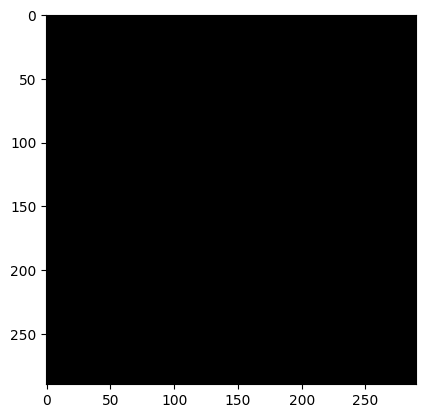

In [19]:
path = '/mnt/storage/deva/Data/ultimate_train.csv'
df = pd.read_csv(path)
df = df[df['BitsStored']==8]

print(df)
resample = df['ResampledNIFTIPath']
for r in resample[:3]:
    image = nib.load(r)
    image = image.dataobj
    print(type(image))
    print(image.dtype)
    # image = np.array(image)['R']
    print(image.shape)
    plt.imshow(image[:,:,image.shape[2]//2,0,3],cmap='gray')
    break
    # plt.figure()


     BitsAllocated  BitsStored BodyPartExamined  Columns  HighBit  \
8                8           8              NaN      512        7   
9                8           8              NaN      512        7   
14               8           8              NaN      512        7   
18               8           8              NaN      512        7   
22               8           8              NaN      512        7   
..             ...         ...              ...      ...      ...   
556              8           8              NaN      512        7   
562              8           8              NaN      512        7   
566              8           8              NaN      512        7   
580              8           8              NaN      512        7   
581              8           8              NaN      512        7   

     InstanceNumber        Manufacturer Modality PatientAge PatientSex  ...  \
8                47  GE MEDICAL SYSTEMS       MR       067Y          F  ...   
9            

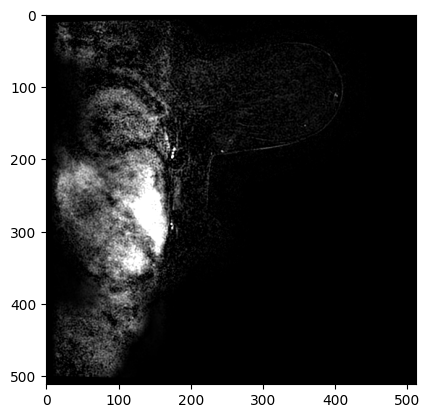

In [15]:
path = '/mnt/storage/deva/Data/ultimate_train.csv'
df = pd.read_csv(path)
df = df[df['BitsStored']==8]

print(df)
resample = df['NIFTI location path']
for r in resample[:3]:
    image = nib.load(r)
    image = image.dataobj
    print(type(image))
    print(image.dtype)
    image = np.array(image)['R']
    plt.imshow(image[:,:,image.shape[2]//2],cmap='gray')
    print(image.shape)
    break
    # plt.figure()


In [20]:
import torch
import torch.nn as nn
import os
import nibabel as nib
import numpy as np
import pandas as pd
from scipy.ndimage import zoom
from torch.utils.data import Dataset, DataLoader
from models.resnet import generate_model
import csv
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import ReduceLROnPlateau

TRAINING_METRICS_FILE_PATH = "Results_feb6/metrics_resnet3d_plateau.csv"
BEST_MODEL_PATH = "best_model_feb6.pth"
class BreastCancer3DDataset(Dataset):
    def __init__(self, csv_path, target_shape=(96, 96, 96), transform=None):
        self.data = pd.read_csv(csv_path)
        self.data['ResampledNIFTIPath'] = self.data['ResampledNIFTIPath'].apply(lambda x: os.path.abspath(x))
        self.labels = self.data['output'].values
        self.image_paths = self.data['ResampledNIFTIPath'].values
        self.target_shape = target_shape
        self.transform = transform
        self.valid_indices = self.check_all_files()
    def check_all_files(self):
        valid_indices = []
        for idx, image_path in enumerate(self.image_paths): 
            try:
                self.load_and_preprocess_image(image_path)
                valid_indices.append(idx)
            except Exception as e:
                print(f"Warning: File {image_path} caused an error {e} and will be skipped")
        return valid_indices

    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        real_idx = self.valid_indices[idx]
        image_path = self.image_paths[real_idx]
        label = self.labels[real_idx]
        image = self.load_and_preprocess_image(image_path)
        if self.transform:
            image = self.transform(image)
        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

    def load_and_preprocess_image(self, image_path):
        image = nib.load(image_path)
        #dtype = uint16
        if(image.header.get_data_dtype() == 'uint16'):
            print(">> Step 1")
            image = image.get_fdata()
            print(">> Step 1a")
        #dtype = uint8 [('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]
        else:
            print(">> Step 2")
            image = image.dataobj
            print(">> Step 2a")
            image = np.array(image[:,:,:,0,0])
            print(">> Step 2b")
        image = 255 * ((image - image.min())/(image.max()-image.min()))
        image = image.astype(np.uint8)
        x, y, z = image.shape[0], image.shape[1], image.shape[2]
        if (y==z):
            image = image.transpose((1,2,0))
        zoom_factors = [t / s for t, s in zip(self.target_shape, image.shape)]
        resized_image = zoom(image, zoom_factors, order=1)
        resized_image = np.interp(resized_image, (resized_image.min(), resized_image.max()), (0, 1))
        return np.expand_dims(resized_image, axis=0)  # Add channel dim
    
def custom_collate_fn(batch):
    images, labels = zip(*batch)  # Unpack batch
    return torch.stack(images), torch.tensor(labels)

def train_model(train_loader, val_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = generate_model(model_depth=18, n_classes=1, n_input_channels=1).to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=10, factor=0.5, verbose=True)
    save_path = BEST_MODEL_PATH
    num_epochs = 50

    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct, train_total = 0.0, 0, 0

        for batch in train_loader[:4]:
            inputs, labels = batch[:2]
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()* inputs.size(0)
            probabilities = torch.sigmoid(outputs)
            preds = (probabilities > 0.5).float()
            train_correct += (preds == labels).sum().item()
            train_total += labels.size(0)
        train_acc = train_correct / train_total if train_total > 0 else 0
        train_loss /= train_total
        # Validation step
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0
        all_labels, all_outputs = [], []
        with torch.no_grad():
            for batch in val_loader:
                inputs, labels = batch[:2]
                inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()* inputs.size(0)
                probabilities = torch.sigmoid(outputs)
                preds = (probabilities > 0.5).float()
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)
            
                all_labels.extend(labels.cpu().numpy())
                all_outputs.extend(outputs.cpu().numpy())
        val_acc = val_correct / val_total if val_total > 0 else 0
        val_loss /= val_total
        scheduler.step(val_loss)
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Learning Rate: {current_lr}")

        # Save the best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), save_path)

        metrics["epoch"].append(epoch + 1)
        metrics["train_loss"].append(train_loss)
        metrics["val_loss"].append(val_loss)
        metrics["train_accuracy"].append(train_acc)
        metrics["val_accuracy"].append(val_acc)
        metrics["learning_rate"].append(current_lr)

    with open(metrics_file, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=metrics.keys())
        writer.writeheader()
        for i in range(len(metrics['epoch'])):
            writer.writerow({key: metrics[key][i] for key in metrics})
    print("metrics are saved")

if __name__ == "__main__":
    metrics_file = TRAINING_METRICS_FILE_PATH
    metrics = {
        "epoch": [],
        "train_loss": [],
        "val_loss": [],
        "train_accuracy": [],
        "val_accuracy": [],
        "learning_rate": []
    }
    # train_csv_path = '/mnt/storage/deva/Data/new_train_data.csv'
    # val_csv_path = '/mnt/storage/deva/Data/new_val_data.csv'
    # test_csv_path = '/mnt/storage/deva/Data/combined_test_data.csv'
    train_csv_path = '/mnt/storage/deva/Data/ultimate_train.csv'
    val_csv_path = '/mnt/storage/deva/Data/ultimate_validation.csv'
    test_csv_path = '/mnt/storage/deva/Data/ultimate_test.csv'

    train_dataset = BreastCancer3DDataset(train_csv_path)
    # val_dataset = BreastCancer3DDataset(val_csv_path)
    # test_dataset = BreastCancer3DDataset(test_csv_path)

    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4, collate_fn=custom_collate_fn)
    # val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=4, collate_fn=custom_collate_fn)
    # test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4, collate_fn=custom_collate_fn)

    train_model(train_loader, val_loader)

>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 2
>> Step 2a
>> Step 2b
>> Step 2
>> Step 2a
>> Step 2b
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 2
>> Step 2a
>> Step 2b
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 2
>> Step 2a
>> Step 2b
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 2
>> Step 2a
>> Step 2b
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 2
>> Step 2a
>> Step 2b
>> Step 2
>> Step 2a
>> Step 2b
>> Step 1
>> Step 1a
>> Step 2
>> Step 2a
>> Step 2b
>> Step 1
>> Step 1a
>> Step 2
>> Step 2a
>> Step 2b
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 2
>> Step 2a
>> Step 2b
>> Step 1
>> Step 1a
>> Step 2
>> Step 2a
>> Step 2b
>> Step 1
>> Step 1a
>> Step 1
>> Step 1a
>> Step 1
>> Step 

KeyboardInterrupt: 

In [ ]:
import pandas as